# Linear Regression Examples:

Example 1: We work on the HR department and we want to create a model to automatically set the salary for new employees based on the years of experience they have. For that, we  gathered historical data from the company and stored in a csv file called "Salary_Data"

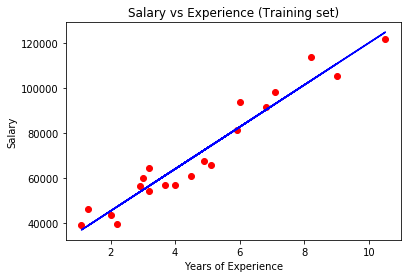

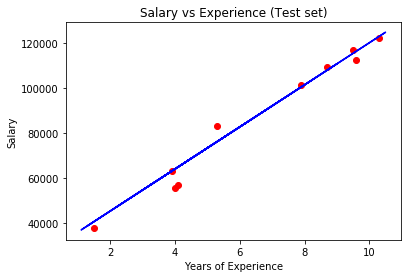

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
# regressor.predict(2)

# How to know when to use linear or polynomial regression?

Text(0, 0.5, 'Residuals')

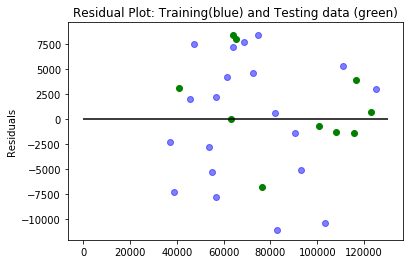

In [10]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, c='b', alpha = .5)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, c='g')
plt.hlines(y = 0, xmin=0, xmax = 130000)
plt.title('Residual Plot: Training(blue) and Testing data (green)')
plt.ylabel('Residuals')

# Let's try a new example

First, we create a new dataset

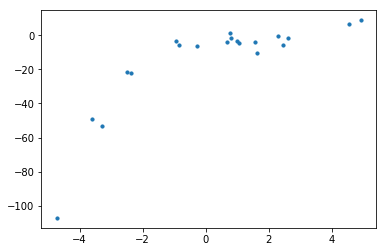

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(X,y, s=10)
plt.show()

### this time the data has a trend that is not linear

## Train a linear model to fit the data:

In [12]:
X=X.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## With the trained model, predict the values of the test data and plot the results

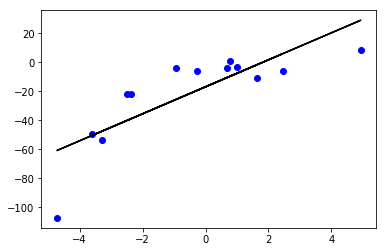

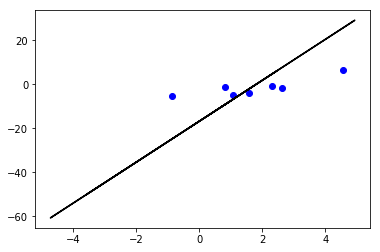

In [15]:
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')

plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')

plt.show()

## Get the performance metrics

In [16]:
import sklearn.metrics as sm

print('Mean absolute error =', round(sm.mean_absolute_error(y_test, regressor.predict(X_test)), 2))
print('Mean squared error =', round(sm.mean_squared_error(regressor.predict(X_test), y_test,), 2))
print('R2 score =', round(sm.r2_score(y_test, regressor.predict(X_test)), 2))


Mean absolute error = 9.25
Mean squared error = 131.45
R2 score = -8.46


# Plot the residuals

Text(0, 0.5, 'Residuals')

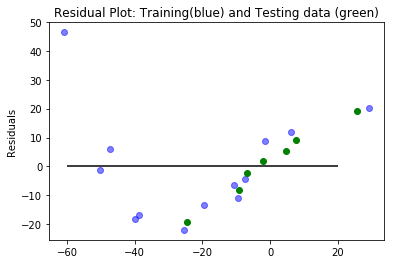

In [17]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, c='b', alpha = .5)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, c='g')
plt.hlines(y = 0, xmin=-60, xmax = 20)
plt.title('Residual Plot: Training(blue) and Testing data (green)')
plt.ylabel('Residuals')

If you notice a trend in the residuals, usually is indicative that linear regression is not the best choice

# Now, let's try a polynomial regressor

### first we need to compute higher terms of the model i.e. x^2, x^3 etc...

In [29]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

### Now, let's split the data including higher terms

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 1/3, random_state = 0)

### Train the linear model with higher terms included

Mean absolute error = 1.41
Mean squared error = 3.2
R2 score = 0.77


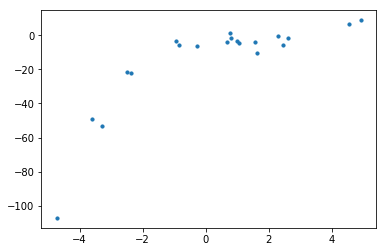

In [31]:



regressor = LinearRegression()
regressor.fit(x_poly, y)
y_poly_pred = regressor.predict(X_train)

print('Mean absolute error =', round(sm.mean_absolute_error(y_test, regressor.predict(X_test)), 2))
print('Mean squared error =', round(sm.mean_squared_error(regressor.predict(X_test), y_test,), 2))
print('R2 score =', round(sm.r2_score(y_test, regressor.predict(X_test)), 2))

plt.scatter(X, y, s=10)


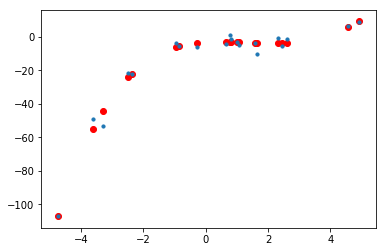

In [32]:
# Visualising the Training set results
plt.scatter(X, regressor.predict(x_poly), color = 'red')
plt.scatter(X,y, s=10)
plt.show()


Text(0, 0.5, 'Residuals')

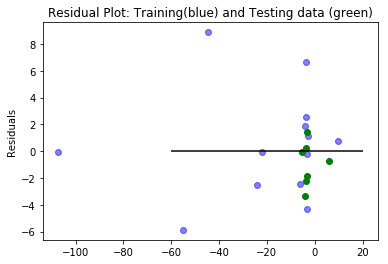

In [33]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, c='b', alpha = .5)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, c='g')
plt.hlines(y = 0, xmin=-60, xmax = 20)
plt.title('Residual Plot: Training(blue) and Testing data (green)')
plt.ylabel('Residuals')